# 개념

* 서로 상관성이 높은 변수들의 선형결합으로 만들어 기존의 상관성이 높은 변수들을 축소하는 기법이다.

* 요인분석과 다르게 요인의 이름을 명명하지 않고 제1 주성분, 제2 주성분 등으로 표현된다.

* 주성분분석의 결과에서 누적기여율 (cumulative proportion)이 85% 이상이면 주성분의 수로 결정할 수 있다.

* 또한 `scree plot`을 그려 기울기가 급격히 줄어드는 전단계로 주성분의 수를 선택한다.

# R실습

* 1973년 미국 50개주의 100,000 명의 인구 당 체포된 세 가지 강력범죄수(assault,murder, rape)와 각 주마다 도시에 거주하는 인구의 비율로 구성된 데이터 셋

* 변수들 간의 척도의 차이가 상당히 크기 때문에 상관행렬을 사용하여 분석한다.

* 특이값 분해를 사용하는 경우 자료 행렬의 각 변수의 평균과 제곱의 합이 1로 표준화 되었다고 가정할 수 있다.

In [4]:
library(datasets)

In [3]:
data(USArrests)

In [5]:
str(USArrests)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


* 산점도

In [9]:
options(repr.plot.res=200, repr.plot.height=4,repr.plot.width=10)

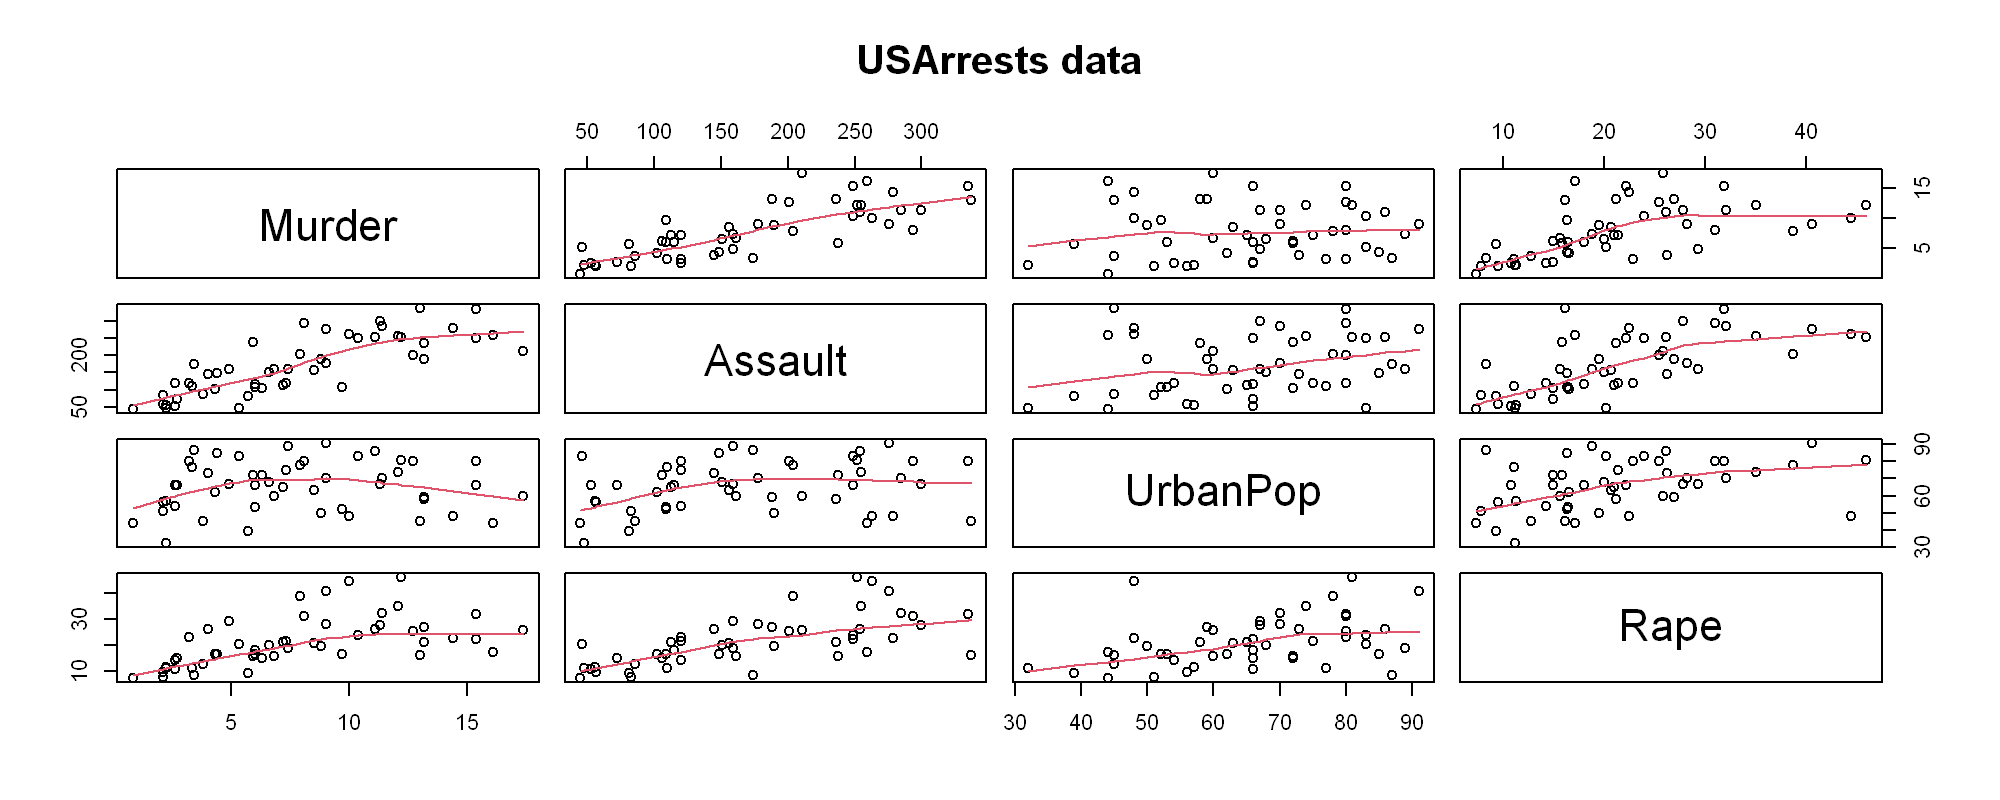

In [14]:
pairs(USArrests,panel= panel.smooth,main="USArrests data")

## princomp vs prcomp

* 둘의 차이는 `princomp`는 원데이터의 상관계수 또는 공분산행렬에 고유값 분해를

*  `prcomp`는 원데이터에 특이값 분해를 적용하여 `PCA`를 수행한다는 것이다.

In [32]:
library(IRdisplay)

In [27]:
setwd("C:\\Users\\rkdcj\\OneDrive\\바탕 화면")

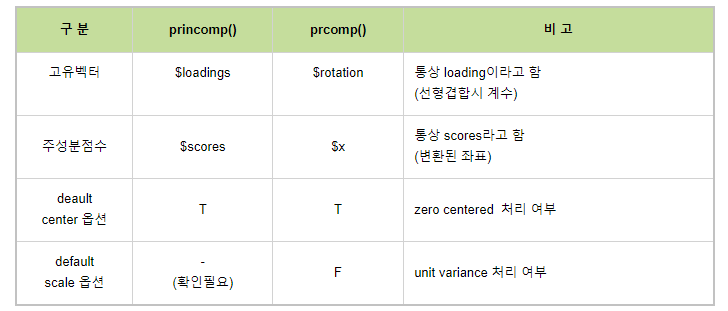

In [31]:
display_png(file="pca.png",width=800,height=700)

In [16]:
summary(princomp(USArrests,cor=T))

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

In [23]:
summary(prcomp(USArrests,scale=T))

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

## 다시 돌아와서

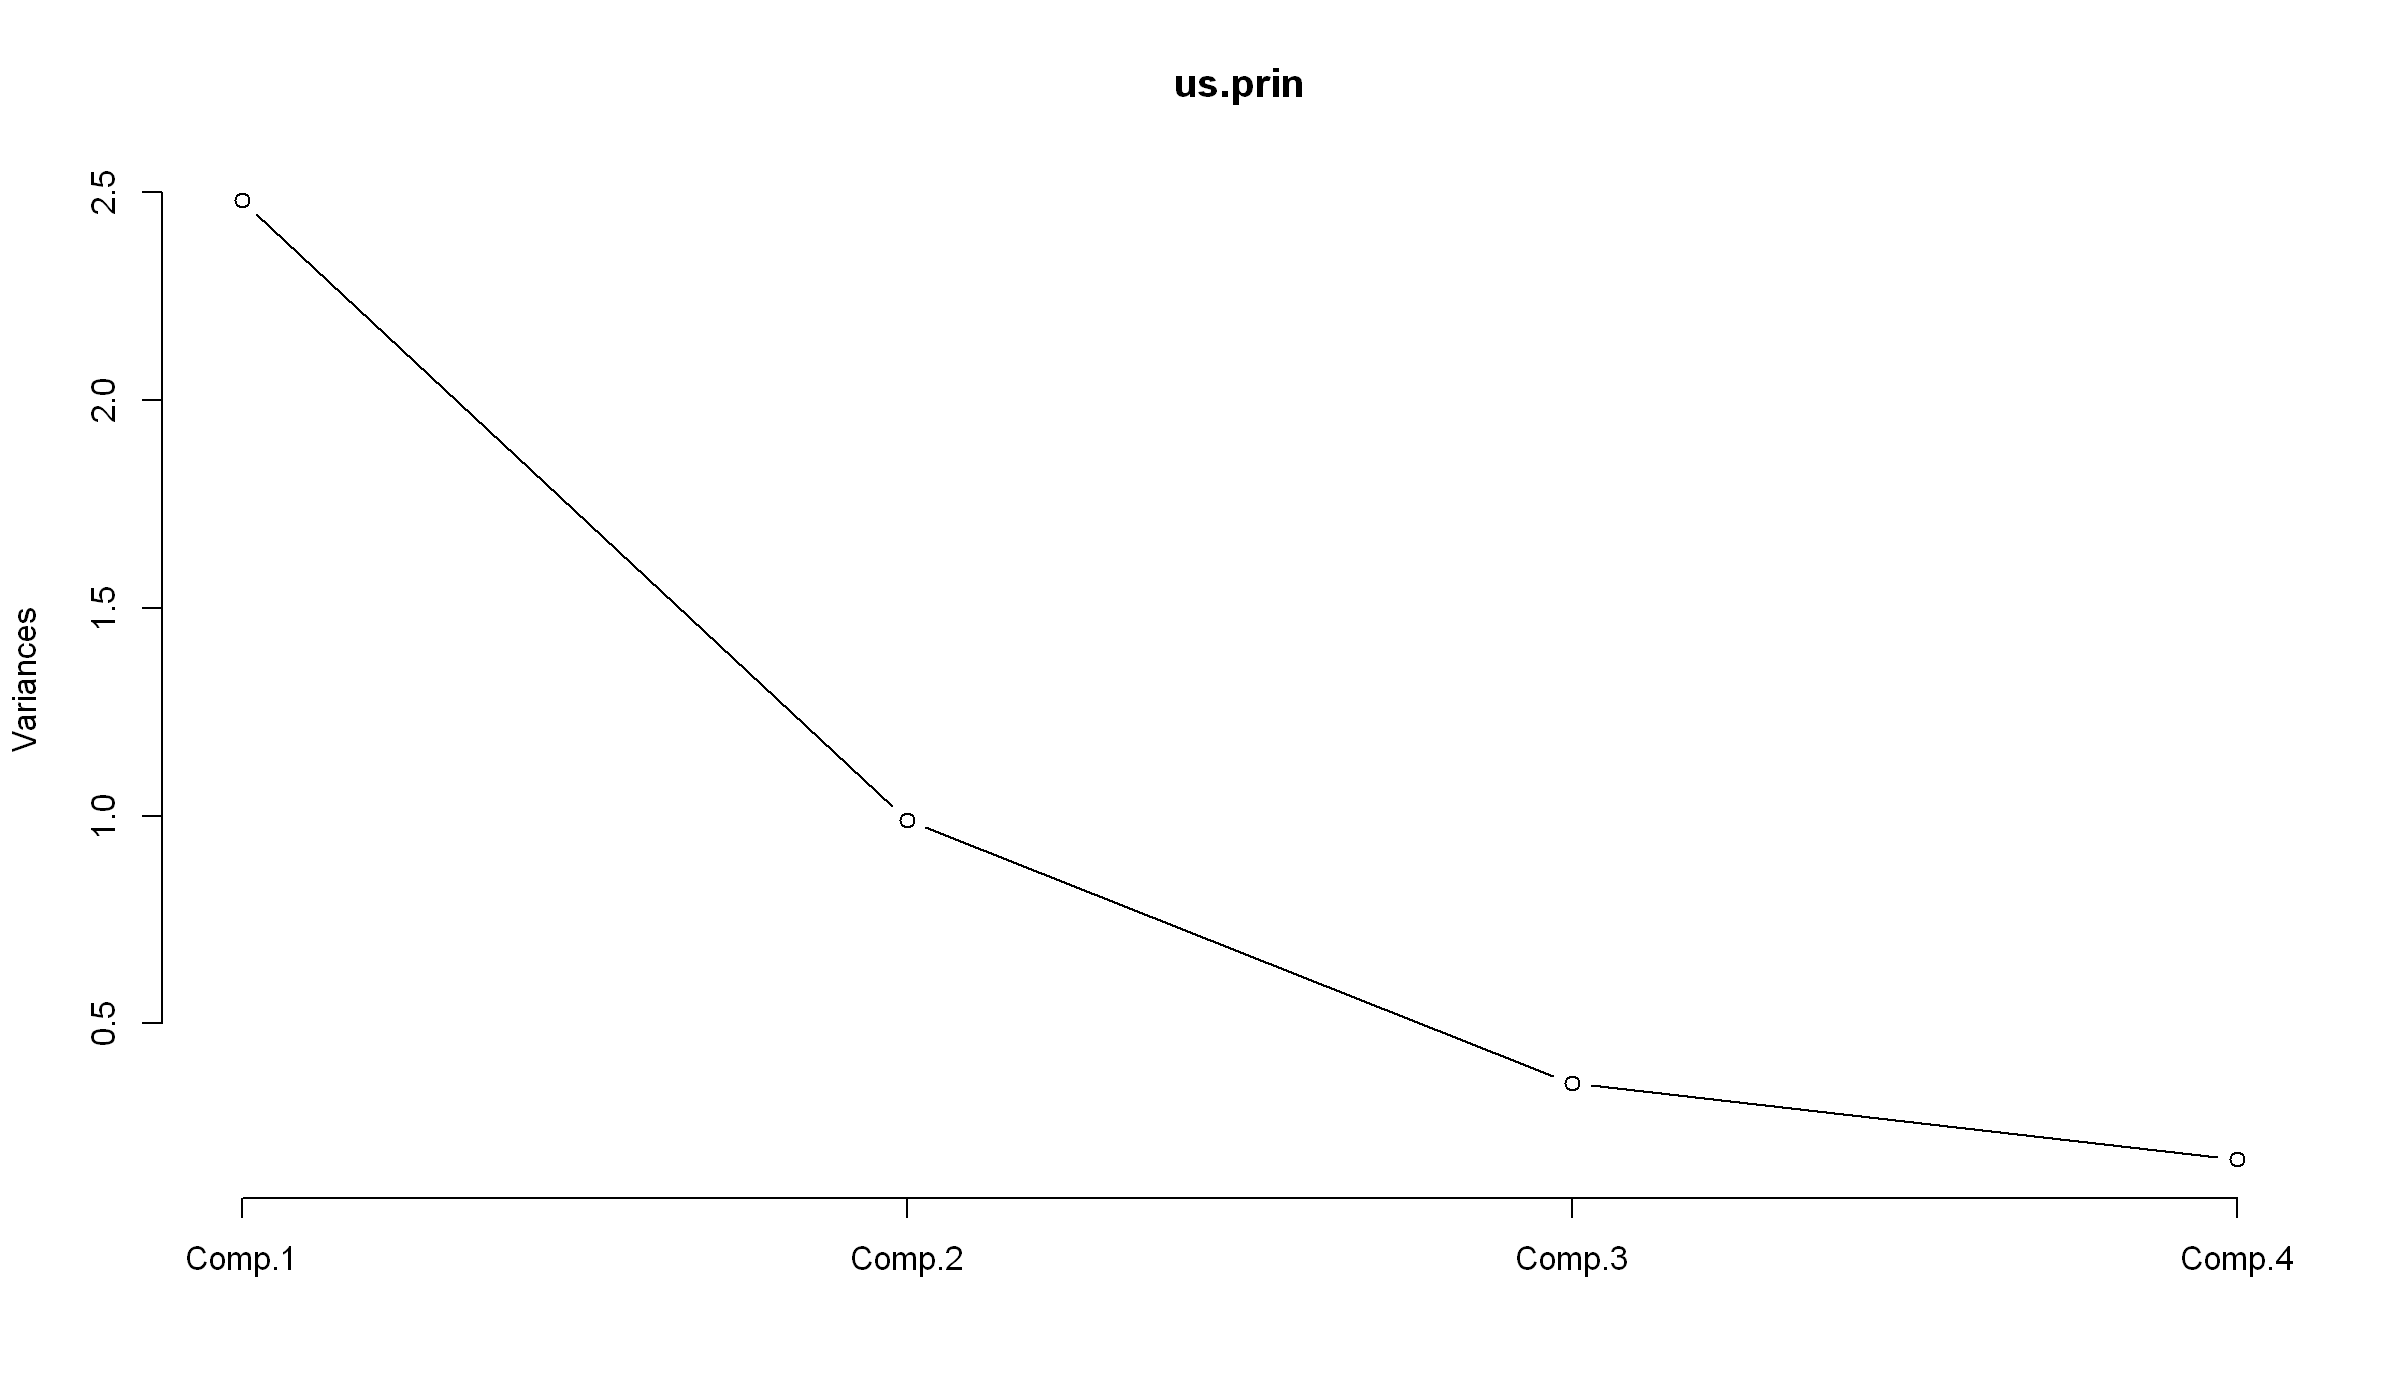

In [56]:
us.prin <- princomp(USArrests,cor=T)
result <- summary(us.prin)
screeplot(us.prin, npcs=4,type="lines")

* 누적기여율을 보았을 때 제 2주성분까지의 채택이 적절하다고 판단된다.
* 또한 screeplot을 그려본결과 분산 감소 기울기가 급격히 줄어들기 전 시점인 2시점에서 제 2주성분을 채택하는 것이 적절하다고 판단된다.

In [37]:
loadings(us.prin)


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

* $Comp1 = 0.536 \times Muder + 0.583 \times Assault + 0.278 \times UrbanPop + 0.543 \times Rape$

* 제 1주성분은 범죄중에서도 `muder, Assault`와 관련있는 변수라고 볼 수 있다.

* 아래는 각 주성분의 선형식을 통해 각 지역별로 얻은 결과이다.

In [39]:
head(us.prin$scores)

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.9855659,1.1333924,0.44426879,0.156267145
Alaska,1.9501378,1.0732133,-2.04000333,-0.438583440
Arizona,1.7631635,-0.7459568,-0.05478082,-0.834652924
Arkansas,-0.1414203,1.1197968,-0.11457369,-0.182810896
California,2.5239801,-1.5429340,-0.59855680,-0.341996478
Colorado,1.5145629,-0.9875551,-1.09500699,0.001464887


In [53]:
options(repr.plot.res=200, repr.plot.height=7,repr.plot.width=12)

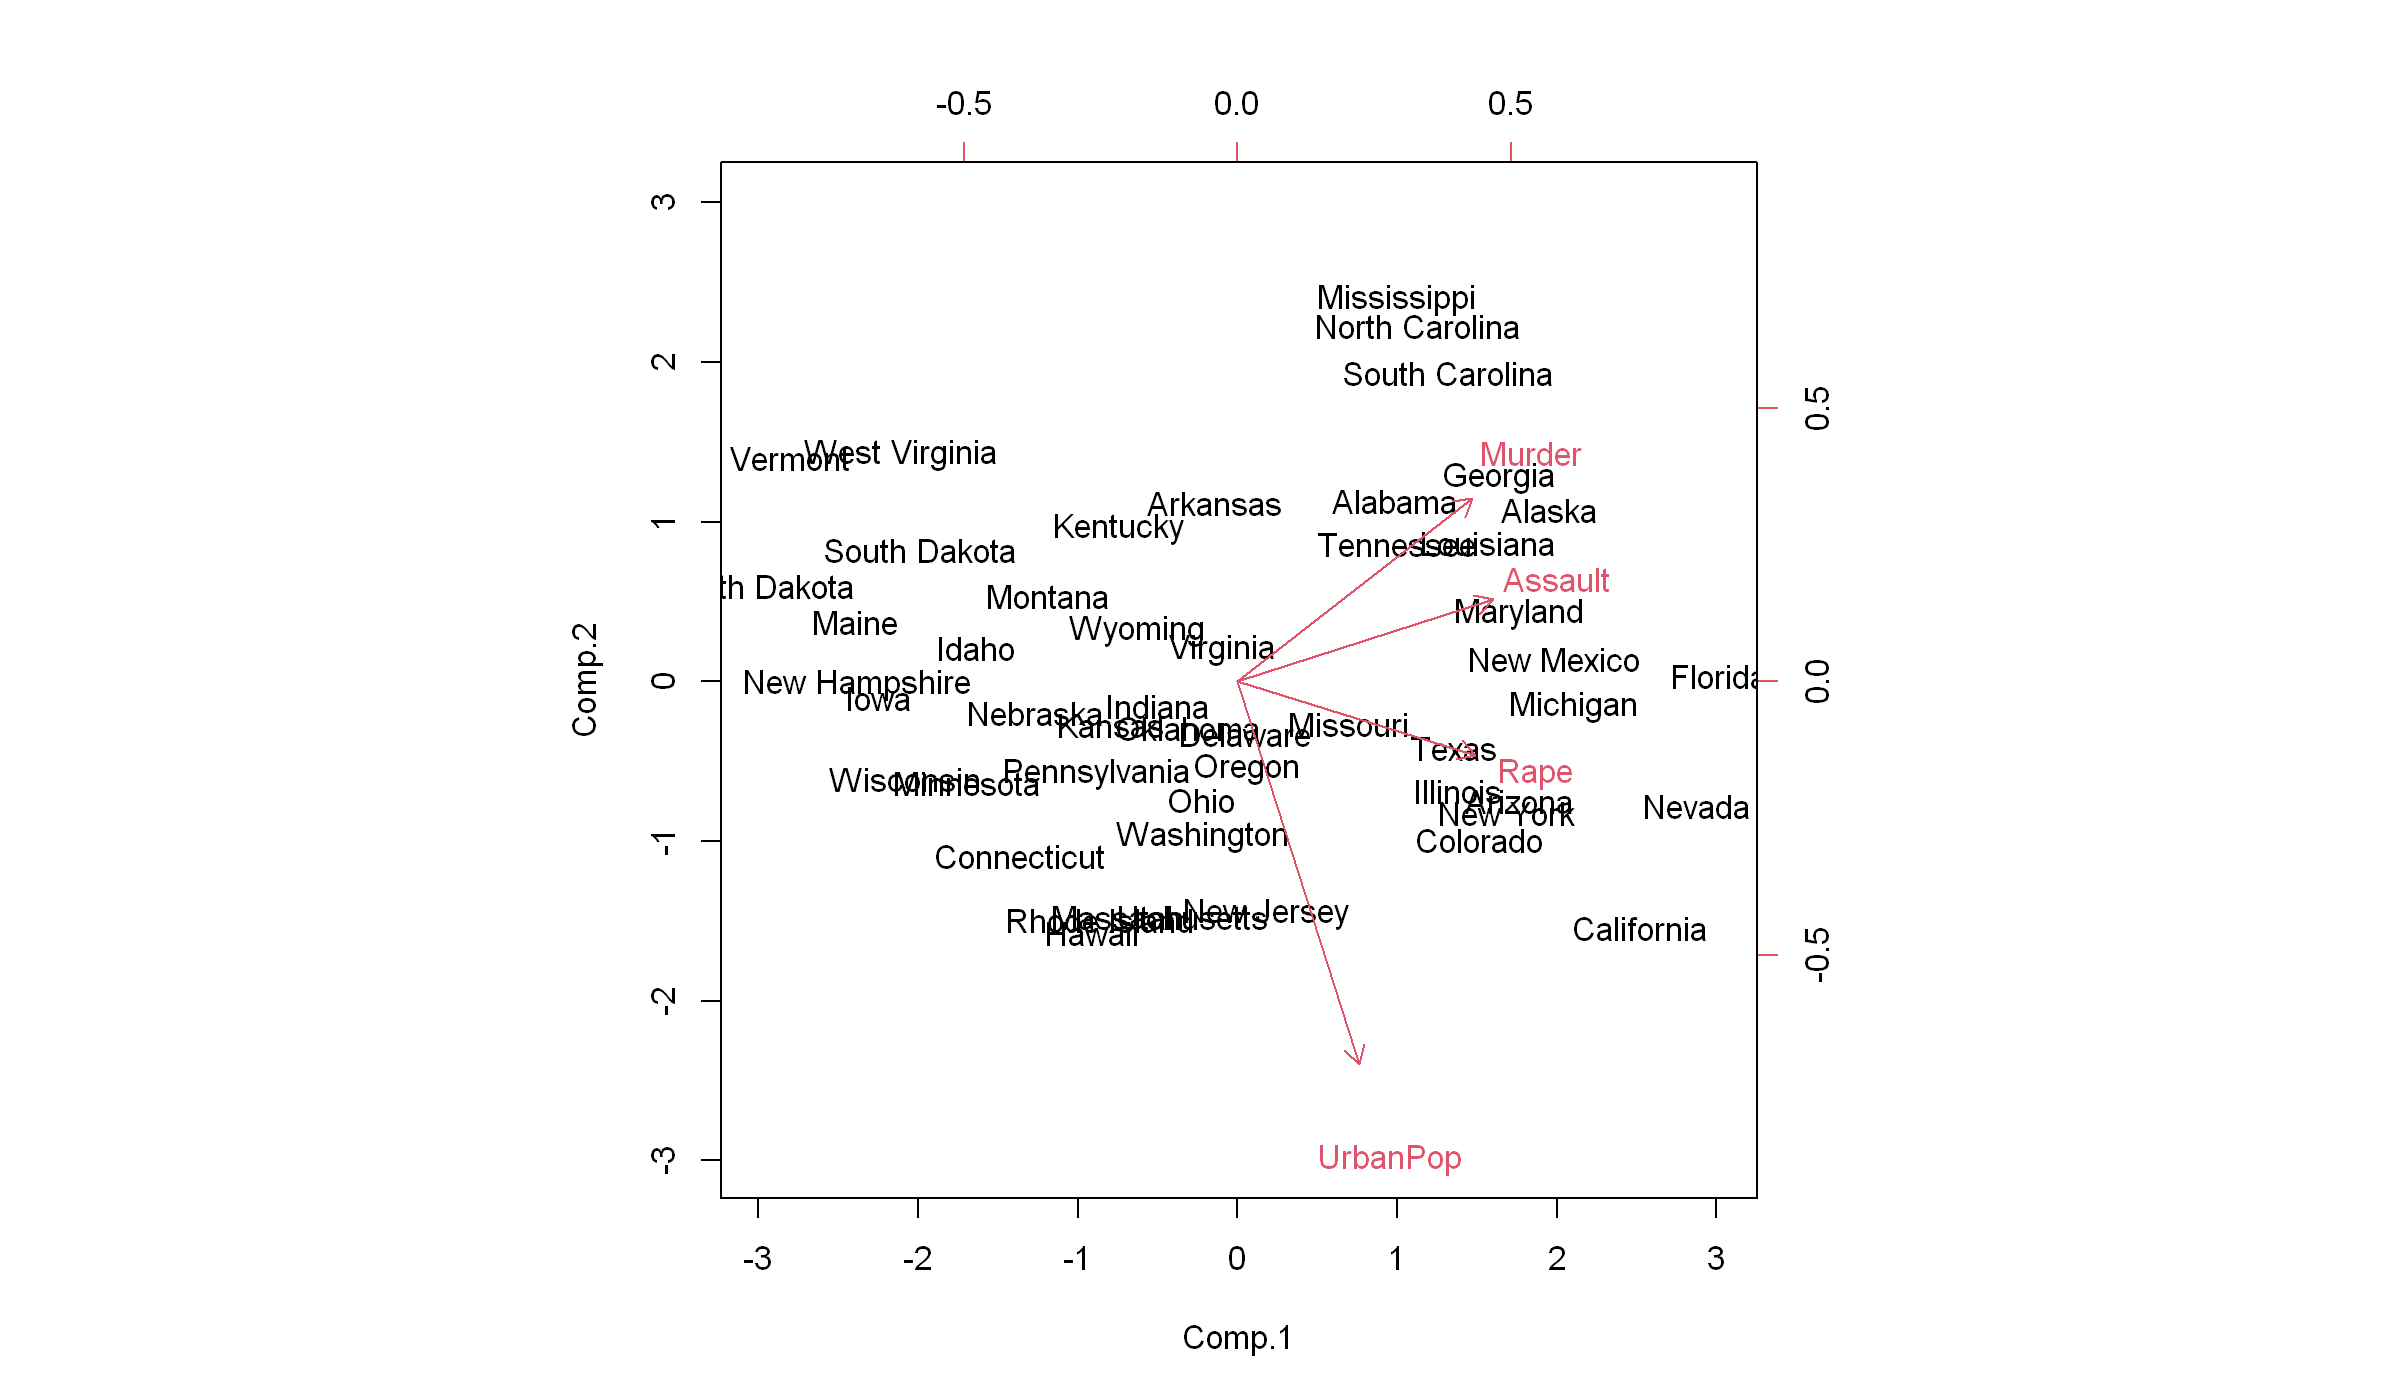

In [54]:
biplot(us.prin,scale=0)

* biplot은 원 변수와 주성분 간의 관계를 그래프로 표현한 것으로 그래프를 통해 각 주성분의 의미를 해석하고 각 개체들의 특성을 파악할 수 있다.

* 화살표는 원 변수와 주성분의 상관계수를 의미하며, 주성분과 평행할수록 상관계수가 크므로 해당 주성분에 큰 영향을 끼친다.

* 그리고 화살표가 같은 방향으로 인접해 있을수록 같은 주성분으로 생성될 수 도 있음을 알 수 있다.

* 제 2주성분을 기준으로 `Urbampop`은 다른 변수들과 방향이 다르므로 상관관계가 낮다.

* 제 1주성분을 기준으로 범죄와 관련된 3변수들은 같은 방향으로 인접해 있는 것을 확인할 수 있다.

* 여기서 이상치인 도시는 `Vermont, West Virginia` 등은 변수 방향, 상관관계가 동떨어져 이상치로 판정될 수 있는 데이터이다.

* 만약 이상치의 특성을 파악하라는 문제가 출제된다면, 위 결과에서 이상치라고 판단되는 값들 중 `West Virginia`는 범죄비율들과 도시인구비율이 적으므로 **"범죄가 없는 시골"** 이라고 해석하여 분석 결과를 본 미국 시민들이 그 도시로 몰릴 수도 있다고 판단할 수 있다.